In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [5]:
df = pd.read_pickle('dataset.pickle') # non tagliato, lo uso solo per i nomi delle colonne
cols = df.columns.tolist()

In [6]:
features = df[cols[1:2] + cols[23:]]
features.head()

,Week,LagoComo_Altezza_1w,LagoComo_Altezza_4w,LagoComo_Altezza_8w,LagoComo_Altezza_12w,LagoComo_Altezza_16w,LagoComo_Altezza_24w,Maggiore_Altezza_1w,Maggiore_Altezza_4w,Maggiore_Altezza_8w,...,Temp8w_piemonte sud,Temp12w_piemonte sud,Temp16w_piemonte sud,Temp24w_piemonte sud,Temp1w_ticino,Temp4w_ticino,Temp8w_ticino,Temp12w_ticino,Temp16w_ticino,Temp24w_ticino
0,35,0.560000,0.776786,0.938393,0.971310,0.987545,0.845476,NaN,NaN,NaN,...,18.620843,18.238677,16.711710,14.267245,14.731351,16.455652,15.249377,14.881221,13.484415,11.078416
1,36,0.359286,0.631429,0.852411,0.904583,0.963393,0.859851,NaN,NaN,NaN,...,18.777796,18.257103,17.134247,14.634167,14.172329,15.834526,15.333391,14.839249,13.876349,11.443543
2,37,0.240714,0.477321,0.755982,0.834881,0.921786,0.865357,NaN,NaN,NaN,...,18.335818,17.900044,17.490815,15.060718,13.168897,14.499421,14.892436,14.487871,14.192587,11.892349
3,38,0.194286,0.338571,0.646607,0.767202,0.869063,0.867738,NaN,NaN,NaN,...,18.264335,17.890267,17.660638,15.357333,14.212220,14.071199,14.932094,14.577738,14.357431,12.174782
4,39,0.199286,0.248393,0.512589,0.708393,0.790580,0.845417,NaN,NaN,NaN,...,18.315188,18.038941,17.897792,15.602887,12.630155,13.545900,15.000776,14.681551,14.547391,12.386760


In [7]:
cols = features.columns.tolist()
features_list = list(zip(range(len(features.columns)), features.columns.tolist()))
features_list

[(0, 'Week'),
 (1, 'LagoComo_Altezza_1w'),
 (2, 'LagoComo_Altezza_4w'),
 (3, 'LagoComo_Altezza_8w'),
 (4, 'LagoComo_Altezza_12w'),
 (5, 'LagoComo_Altezza_16w'),
 (6, 'LagoComo_Altezza_24w'),
 (7, 'Maggiore_Altezza_1w'),
 (8, 'Maggiore_Altezza_4w'),
 (9, 'Maggiore_Altezza_8w'),
 (10, 'Maggiore_Altezza_12w'),
 (11, 'Maggiore_Altezza_16w'),
 (12, 'Maggiore_Altezza_24w'),
 (13, 'Lugano_Altezza_1w'),
 (14, 'Lugano_Altezza_4w'),
 (15, 'Lugano_Altezza_8w'),
 (16, 'Lugano_Altezza_12w'),
 (17, 'Lugano_Altezza_16w'),
 (18, 'Lugano_Altezza_24w'),
 (19, 'LagoIseo_Altezza_1w'),
 (20, 'LagoIseo_Altezza_4w'),
 (21, 'LagoIseo_Altezza_8w'),
 (22, 'LagoIseo_Altezza_12w'),
 (23, 'LagoIseo_Altezza_16w'),
 (24, 'LagoIseo_Altezza_24w'),
 (25, 'Prec1w_adda'),
 (26, 'Prec4w_adda'),
 (27, 'Prec8w_adda'),
 (28, 'Prec12w_adda'),
 (29, 'Prec16w_adda'),
 (30, 'Prec24w_adda'),
 (31, 'Prec1w_dora'),
 (32, 'Prec4w_dora'),
 (33, 'Prec8w_dora'),
 (34, 'Prec12w_dora'),
 (35, 'Prec16w_dora'),
 (36, 'Prec24w_dora'),
 (37,

# Target aree singole

## Delta < 0.05

In [9]:
adda = [60]
dora = [124]
emi1 = [0]
emi2 = [0]
garda = [0]
lambro = [0]
oglio = [42]
piemnord = [42]
piemsud = [109]
ticino = [130]

aree = [adda,dora,emi1,emi2,garda,lambro,oglio,piemnord,piemsud,ticino]

In [10]:
aree = list(itertools.chain.from_iterable(aree))
common_features = list(dict.fromkeys(aree))
common_features.sort()
selected_features = [f[1] for f in features_list if f[0] in common_features]
feat_dict = list(zip(common_features,selected_features))

In [12]:
aree = [adda,dora,emi1,emi2,garda,lambro,oglio,piemnord,piemsud,ticino]
for i in range(len(aree)):
    aree[i] = [1 if f[0] in aree[i] else 0 for f in feat_dict]
    aree[i] = dict(list(zip(selected_features,aree[i])))

In [13]:
colors = ['blue','midnightblue','yellow','orange','aqua','steelblue','lawngreen','slategrey','red','magenta']

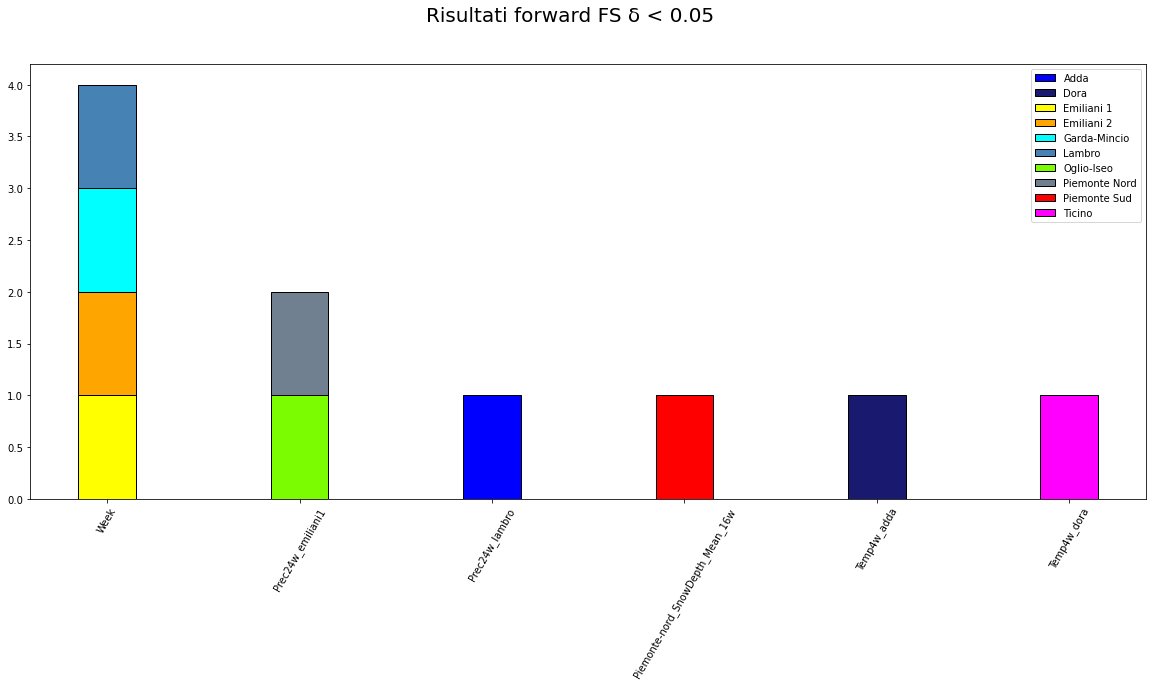

In [14]:
ax = pd.DataFrame(aree).T.plot(kind='bar',figsize=(20,8), stacked=True ,width=0.3, color=colors, rot=60, edgecolor='black')
plt.gcf().suptitle("Risultati forward FS \u03B4 < 0.05",fontsize=20)
ax.legend(['Adda','Dora','Emiliani 1', 'Emiliani 2', 'Garda-Mincio', 'Lambro', 'Oglio-Iseo', 'Piemonte Nord', 'Piemonte Sud','Ticino'])

## Delta >= 0.05

In [18]:
adda = [60, 12, 6, 23]
dora = [124, 12, 66, 106, 166]
emi1 = [0, 24, 133, 139, 157]
emi2 = [0, 24, 157, 6]
garda = [0, 84, 173, 149, 137, 167, 161, 179]
lambro = [0, 24, 48, 5, 90]
oglio = [42, 5, 125, 24, 48, 137, 161]
piemnord = [42, 72, 56, 78]
piemsud = [109, 41]
ticino = [130, 26, 100, 124, 178]

aree = [adda,dora,emi1,emi2,garda,lambro,oglio,piemnord,piemsud,ticino]

In [19]:
aree = list(itertools.chain.from_iterable(aree))
common_features = list(dict.fromkeys(aree))
common_features.sort()
selected_features = [f[1] for f in features_list if f[0] in common_features]
feat_dict = list(zip(common_features,selected_features))

In [20]:
aree = [adda,dora,emi1,emi2,garda,lambro,oglio,piemnord,piemsud,ticino]
for i in range(len(aree)):
    aree[i] = [1 if f[0] in aree[i] else 0 for f in feat_dict]
    aree[i] = dict(list(zip(selected_features,aree[i])))

In [21]:
colors = ['blue','midnightblue','yellow','orange','aqua','steelblue','lawngreen','slategrey','red','magenta']

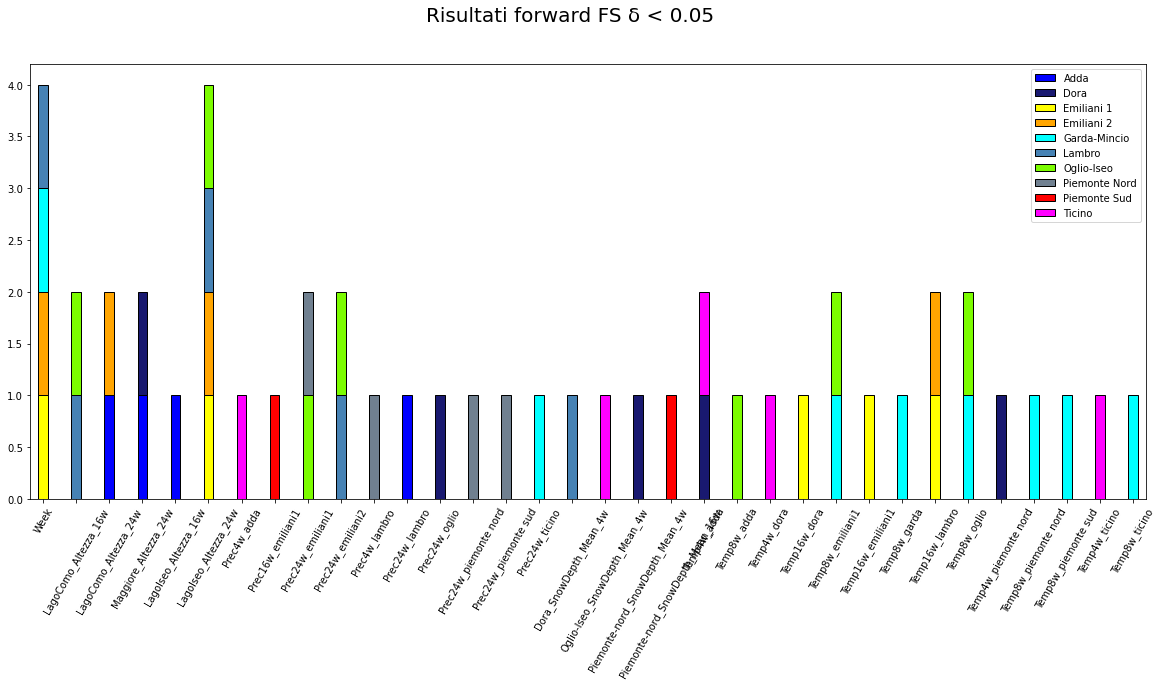

In [22]:
ax = pd.DataFrame(aree).T.plot(kind='bar',figsize=(20,8), stacked=True ,width=0.3, color=colors, rot=60, edgecolor='black')
plt.gcf().suptitle("Risultati forward FS \u03B4 < 0.05",fontsize=20)
ax.legend(['Adda','Dora','Emiliani 1', 'Emiliani 2', 'Garda-Mincio', 'Lambro', 'Oglio-Iseo', 'Piemonte Nord', 'Piemonte Sud','Ticino'])